<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-3637025472.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


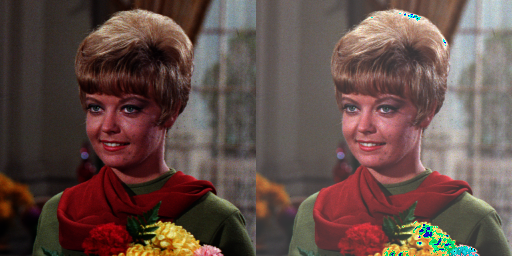

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/Tugas PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv2.convertScaleAbs(original,beta=brightness)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM D1**

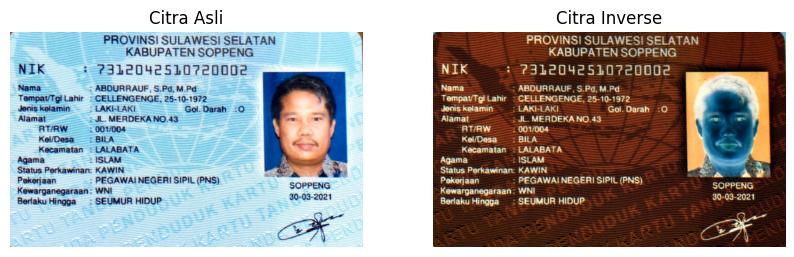

In [ ]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Tugas PCVK/KTP.jpeg"

image = cv2.imread(img_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

inverse_img = 255 - image_rgb

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(inverse_img)
plt.title("Citra Inverse")
plt.axis("off")

plt.show()


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


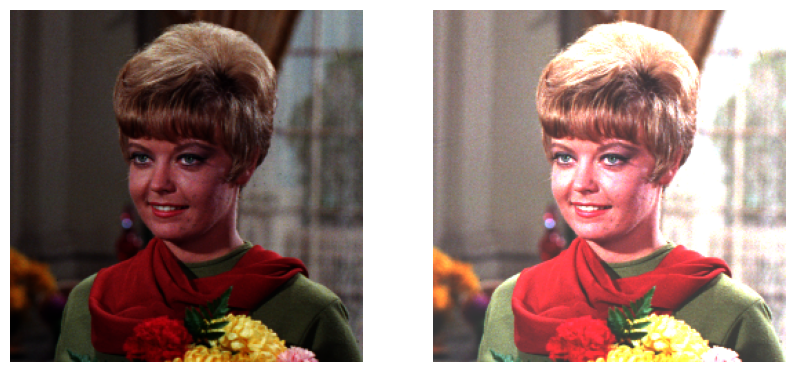

In [3]:
import cv2
import matplotlib.pyplot as plt


print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')

img_path = "/content/drive/MyDrive/Tugas PCVK/female.tiff"

image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

adjusted = cv2.convertScaleAbs(image_rgb, alpha=contrast, beta=brightness)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(adjusted)
plt.axis("off")

plt.show()

 Mengubah tingkat kecerahan citra dengan Transformasi Log: 
----------------------------------
Masukkan nilai kecerahan: 50


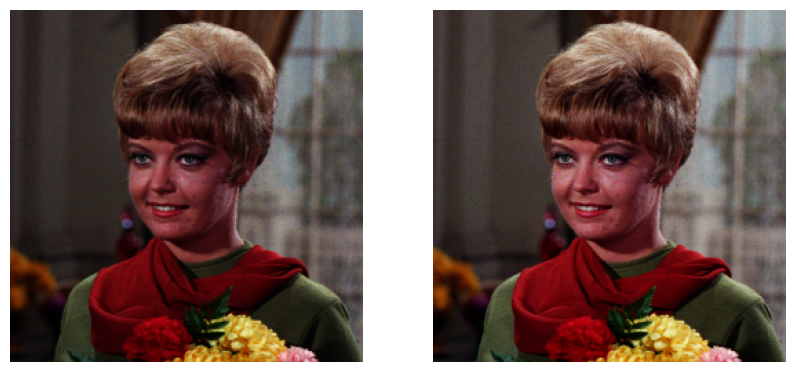

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log: ')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))

except ValueError:
    print('Error, not a number')

img_path = "/content/drive/MyDrive/Tugas PCVK/female.tiff"

image = cv2.imread(img_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

normalized = image_rgb / 255.0

log_transformed = c * np.log(1 + normalized)

log_transformed = cv2.normalize(log_transformed, None, 0, 255, cv2.NORM_MINMAX)
log_transformed = np.uint8(log_transformed)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(log_transformed)
plt.axis("off")

plt.show()


a. Averaging


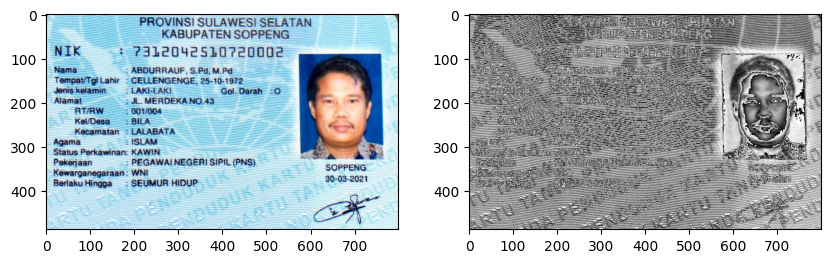

b. Lightness


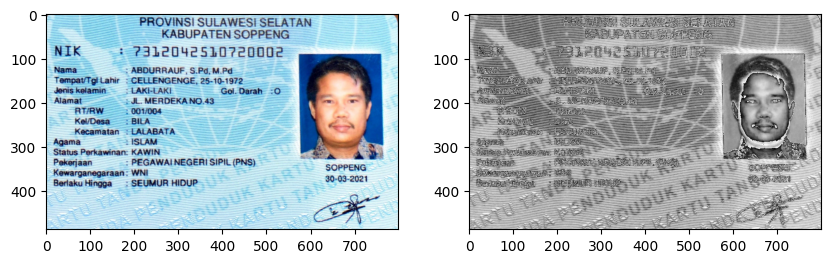

c. Luminance


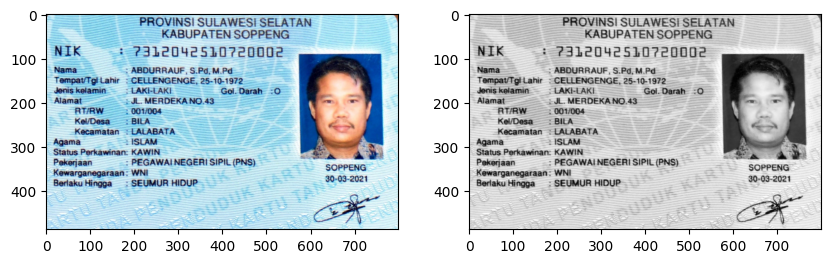

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Tugas PCVK/KTP.jpeg"

image = cv2.imread(img_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

R = image_rgb[:,:,0]
G = image_rgb[:,:,1]
B = image_rgb[:,:,2]

gray_avg = ((R + G + B) / 3).astype(np.uint8)

gray_light = ((np.maximum(np.maximum(R,G),B) + np.minimum(np.minimum(R,G),B)) / 2).astype(np.uint8)

gray_lum = (0.299*R + 0.587*G + 0.114*B).astype(np.uint8)


# a. Averaging
print("a. Averaging")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.subplot(1,2,2)
plt.imshow(gray_avg, cmap="gray")
plt.show()

print("b. Lightness")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.subplot(1,2,2)
plt.imshow(gray_light, cmap="gray")
plt.show()

print("c. Luminance")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.subplot(1,2,2)
plt.imshow(gray_lum, cmap="gray")
plt.show()


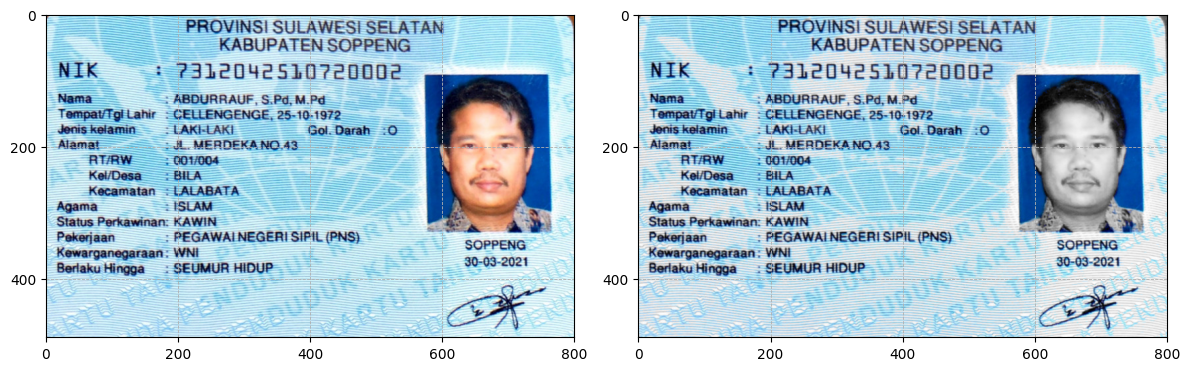

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Tugas PCVK/KTP.jpeg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

result = np.where(mask[:, :, None] == 255, img, gray_bgr)

h, w = img.shape[:2]
step = 200
xticks = np.arange(0, w+1, step)
yticks = np.arange(0, h+1, step)

plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_xticks(xticks)
ax1.set_yticks(yticks)
ax1.set_xlim([0, w])
ax1.set_ylim([h, 0])
ax1.grid(True, linestyle='--', linewidth=0.6)

ax2 = plt.subplot(1,2,2)
ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax2.set_xticks(xticks)
ax2.set_yticks(yticks)
ax2.set_xlim([0, w])
ax2.set_ylim([h, 0])
ax2.grid(True, linestyle='--', linewidth=0.6)

plt.tight_layout()
plt.show()
